### Load required libraries and data

In [21]:
import os
import anndata as ad
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import copy
import re
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime
from igraph import *
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import arviz as az

pwd = os.getcwd()

In [ ]:
# 生成neuron的anadata

In [20]:
region = "cross_areal"
formula = "sex + "
covariates = ["library_prep", "sex", "donor", "region"]
tests = ["region"]
labels_keys=["class", "cross_area_subclass", "cross_area_cluster"]
cell_count = pd.read_csv("./8_wholeMeta.csv")
split_key = "class"
split_value = ["excitatory", "inhibitory"]
random_effect = "library_prep"
for j in labels_keys:
    print(j)
    cell_count = cell_count.loc[[i in split_value for i in cell_count[split_key]], :]
    counts = sp.sparse.csr_matrix(np.random.poisson(1, size=(cell_count.shape[0], 0)), dtype=np.float32)
    adata = ad.AnnData(counts)
    adata.obs_names = cell_count.index
    adata.obs = cell_count

    abundances = dat.from_scanpy(
        adata,
        cell_type_identifier=j,
        sample_identifier=random_effect,
    )
    tmp = adata.obs.loc[:, covariates]
    tmp.drop_duplicates(inplace=True)
    tmp.index = tmp.library_prep
    tmp.drop([random_effect], axis=1, inplace=True)
    abundances.obs = tmp.loc[abundances.obs.index, :]
    abundances.write_h5ad("neuron"+ j + ".h5ad")

class


/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [70406, 70407, 70408, 70409, 70410]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [70406, 70407, 70408, 70409, 70410]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


KeyError: 'library_prep'

In [22]:
region = "cross_areal"
formula = "sex + "
covariates = ["library_prep", "sex", "donor", "region"]
tests = ["region"]
labels_keys=["cross_area_subclass", "cross_area_cluster"]
cell_count = pd.read_csv("./8_wholeMeta.csv")
split_key = "class"
split_value = ["non-neuronal"]
random_effect = "library_prep"
for j in labels_keys:
    print(j)
    cell_count = cell_count.loc[[i in split_value for i in cell_count[split_key]], :]
    counts = sp.sparse.csr_matrix(np.random.poisson(1, size=(cell_count.shape[0], 0)), dtype=np.float32)
    adata = ad.AnnData(counts)
    adata.obs_names = cell_count.index
    adata.obs = cell_count

    abundances = dat.from_scanpy(
        adata,
        cell_type_identifier=j,
        sample_identifier=random_effect,
    )
    tmp = adata.obs.loc[:, covariates]
    tmp.drop_duplicates(inplace=True)
    tmp.index = tmp.library_prep
    tmp.drop([random_effect], axis=1, inplace=True)
    abundances.obs = tmp.loc[abundances.obs.index, :]
    abundances.write_h5ad("non"+ j + ".h5ad")

cross_area_subclass


/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


No covariate information specified!
cross_area_cluster
No covariate information specified!


/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/home/luomeng/miniconda3/envs/sccoda/lib/python3.9/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [ ]:
# 生成non的abandunce

In [ ]:
import os
import anndata as ad
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import copy
import re
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime
from igraph import *
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import arviz as az
import sys
pwd = os.getcwd()

abundances = sys.argv[1] # 第一个参数是label

ct = cell_types[i]
print("Reference cell type: " + ct)

cell_count = cell_count.loc[[i in split_value for i in cell_count[split_key]], :]
counts = sp.sparse.csr_matrix(np.random.poisson(1, size=(cell_count.shape[0], 0)), dtype=np.float32)
adata = ad.AnnData(counts)
adata.obs_names = cell_count.index
adata.obs = cell_count

pickle_file = os.path.join(pwd, "output", region, k, l, ct.replace("/", " ") + ".pkl")
if os.path.exists(pickle_file):
    with open(pickle_file, 'rb') as pickle_load:
        results = pickle.load(pickle_load)

else:
    models = mod.CompositionalAnalysis(abundances, formula=formula + "C(" + k + ", Treatment('" + l + "'))", reference_cell_type=ct)
    results = models.sample_hmc()
    results.save(pickle_file)

### Define analysis functions

In [33]:
def run_scCODA(cell_count, random_effect, split_key, split_value, labels_keys, tests, region, covariates, formula, diagnostic_plots=True, figsize=(20,6)):
    #region = "cross_areal"
    #formula = "sex + "
    #covariates = ["library_prep", "sex", "donor", "region"]
    #tests = ["region"]
    #labels_keys=["class", "cross_area_subclass", "cross_area_cluster"]
    for j in labels_keys:
        print(str(datetime.now()) + " -- Starting labels_keys=" + j)
        cell_count = cell_count.loc[[i in split_value for i in cell_count[split_key]], :]
        counts = sp.sparse.csr_matrix(np.random.poisson(1, size=(cell_count.shape[0], 0)), dtype=np.float32)
        adata = ad.AnnData(counts)
        adata.obs_names = cell_count.index
        adata.obs = cell_count

        abundances = dat.from_scanpy(
            adata,
            cell_type_identifier=j,
            sample_identifier=random_effect,
        )
        tmp = adata.obs.loc[:, covariates]
        tmp.drop_duplicates(inplace=True)
        tmp.index = tmp.library_prep
        tmp.drop([random_effect], axis=1, inplace=True)
        abundances.obs = tmp.loc[abundances.obs.index, :]

        if diagnostic_plots == True:
            tmp = abundances.obs.copy()
            for i in tmp.columns:
                if i.endswith("_codes"):
                    continue
                tmp[i] = tmp[i].astype("category")
                tmp[i + "_codes"] = tmp[i].cat.codes
                tmp.drop(i, axis=1, inplace=True)
            results = np.zeros((tmp.shape[1],tmp.shape[1]))

            for a in range(tmp.shape[1]):
                for b in range(tmp.shape[1]):
                    results[a,b] = sp.stats.spearmanr(tmp.iloc[:,a], tmp.iloc[:,b])[0]

            results = pd.DataFrame(results, columns=tmp.columns, index=tmp.columns)
            sns.heatmap(results);
            plt.show()
            try:
                boxplots(abundances, feature_name="region", figsize=figsize, y_scale="log_relative")
            except:
                boxplots(abundances, feature_name="species", figsize=figsize, y_scale="log_relative")
            boxplots(abundances, feature_name="sex", figsize=figsize, y_scale="log_relative")
            plt.show()

        outfile = " ".join(split_value) + "_" + j + "_results.csv"
        abundances.to_csv("")
        for k in tests:
            print(str(datetime.now()) + " -- testing across " + k)
            if (abundances.obs[k].dtype == "object" and len(np.unique(abundances.obs[k])) < 3) or abundances.obs[k].dtype != "object":
                if os.path.exists(os.path.join(pwd, "output", region, k)) is False:
                    os.makedirs(os.path.join(pwd, "output", region, k))
                i = 0
                cell_types = abundances.var.index
                try:
                    del results_table
                except:
                    pass

                while i < cell_types.shape[0]:    

                    ct = cell_types[i]
                    print("Reference: " + ct)

                    pickle_file = os.path.join(pwd, "output", region, k, ct.replace("/", " ") + ".pkl")
                    if os.path.exists(pickle_file):
                        with open(pickle_file, 'rb') as pickle_load:
                            results = pickle.load(pickle_load)

                    else:
                        models = mod.CompositionalAnalysis(abundances, formula=formula + k, reference_cell_type=ct)
                        results = models.sample_hmc()
                        results.save(pickle_file)

                    accepted = results.sample_stats["is_accepted"].to_numpy()

                    if accepted.sum() / accepted.shape[1] < 0.6:
                        del results
                        os.remove(pickle_file)
                        print("Did not achieve acceptance threshold, trying again")
                        continue

                    else:
                        print("Converged!")
                        i = i + 1

                    current_results = results.summary_prepare()[1]
                    current_results = current_results.reset_index()
                    current_results["Reference Cell Type"] = ct

                    try:
                        results_table = pd.concat([results_table, current_results], axis=0)
                    except:
                        results_table = current_results.copy()

                results_table.to_csv(os.path.join(pwd, "output", region, k, outfile))
            else:
                for l in np.unique(abundances.obs[k]): # l
                    if os.path.exists(os.path.join(pwd, "output", region, k, l)) is False:
                        os.makedirs(os.path.join(pwd, "output", region, k, l))

                    print("Reference " + k + ": " + l)
                    i = 0
                    cell_types = abundances.var.index
                    try:
                        del results_table
                    except:
                        pass

                    while i < cell_types.shape[0]:    

                        ct = cell_types[i]
                        print("Reference cell type: " + ct)

                        pickle_file = os.path.join(pwd, "output", region, k, l, ct.replace("/", " ") + ".pkl")
                        if os.path.exists(pickle_file):
                            with open(pickle_file, 'rb') as pickle_load:
                                results = pickle.load(pickle_load)

                        else:
                            models = mod.CompositionalAnalysis(abundances, formula=formula + "C(" + k + ", Treatment('" + l + "'))", reference_cell_type=ct)
                            results = models.sample_hmc()
                            results.save(pickle_file)

                        accepted = results.sample_stats["is_accepted"].to_numpy()

                        if accepted.sum() / accepted.shape[1] < 0.6:
                            del results
                            os.remove(pickle_file)
                            print("Did not achieve acceptance threshold, trying again")
                            continue

                        else:
                            print("Converged!")
                            i = i + 1

                        current_results = results.summary_prepare()[1]
                        current_results = current_results.reset_index()
                        current_results["Reference Cell Type"] = ct

                        try:
                            results_table = pd.concat([results_table, current_results], axis=0)
                        except:
                            results_table = current_results.copy()

                    results_table.to_csv(os.path.join(pwd, "output", region, k, l, outfile)) 
            
def boxplots(
        data,
        feature_name,
        y_scale="relative",
        plot_facets=False,
        add_dots=False,
        cell_types=None,
        args_boxplot={},
        args_swarmplot={},
        figsize=None,
        dpi=100,
        cmap="Blues",
        plot_legend=True,
        level_order=None):
    """
    Grouped boxplot visualization. The cell counts for each cell type are shown as a group of boxplots,
    with intra--group separation by a covariate from data.obs.
    The cell type groups can either be ordered along the x-axis of a single plot (plot_facets=False) or as plot facets (plot_facets=True).
    Parameters
    ----------
    data
        A scCODA-compatible data object
    feature_name
        The name of the feature in data.obs to plot
    y_scale
        Transformation to of cell counts. Options: "relative" - Relative abundance, "log" - log(count), "count" - absolute abundance (cell counts)
    plot_facets
        If False, plot cell types on the x-axis. If True, plot as facets
    add_dots
        If True, overlay a scatterplot with one dot for each data point
    cell_types
        Subset of cell types that should be plotted
    args_boxplot
        Arguments passed to sns.boxplot
    args_swarmplot
            Arguments passed to sns.swarmplot
    figsize
        figure size
    dpi
        dpi setting
    cmap
        The seaborn color map for the barplot
    plot_legend
        If True, adds a legend
    level_order
        Custom ordering of bars on the x-axis
    Returns
    -------
    Depending on `plot_facets`, returns a :class:`~plt.AxesSubplot` (`plot_facets = False`) or :class:`~sns.axisgrid.FacetGrid` (`plot_facets = True`) object
    ax
        if `plot_facets = False`
    g
        if `plot_facets = True`
    """

    # y scale transformations
    if y_scale == "relative":
        sample_sums = np.sum(data.X, axis=1, keepdims=True)
        X = data.X/sample_sums
        value_name = "Proportion"
    elif y_scale == "log_relative":
        sample_sums = np.sum(data.X, axis=1, keepdims=True)
        X = np.log10((data.X + 1)/(sample_sums + data.shape[1]))
        value_name = "log(Proportion)"
    # add pseudocount 1 if using log scale (needs to be improved)
    elif y_scale == "log":
        X = np.log10(data.X + 1)
        value_name = "log(count)"
    elif y_scale == "count":
        X = data.X
        value_name = "count"
    else:
        raise ValueError("Invalid y_scale transformation")

    count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
        merge(data.obs[feature_name], left_index=True, right_index=True)
    plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)
    if cell_types is not None:
        plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

    if plot_facets:

        if level_order is None:
            level_order = pd.unique(plot_df[feature_name])

        K = X.shape[1]

        g = sns.FacetGrid(
            plot_df,
            col="Cell type",
            sharey=False,
            col_wrap=np.floor(np.sqrt(K)),
            height=5,
            aspect=2,
        )
        g.map(
            sns.boxplot,
            feature_name,
            value_name,
            palette=cmap,
            order=level_order,
            **args_boxplot
        )

        if add_dots:

            if "hue" in args_swarmplot:
                hue = args_swarmplot.pop("hue")
            else:
                hue = None

            if hue is None:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    color="black",
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")
            else:
                g.map(
                    sns.swarmplot,
                    feature_name,
                    value_name,
                    hue,
                    order=level_order,
                    **args_swarmplot
                ).set_titles("{col_name}")

        return g

    else:

        if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

        sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
                    palette=cmap, ax=ax, **args_boxplot)

        if add_dots:
            sns.swarmplot(
                x="Cell type",
                y=value_name,
                data=plot_df,
                hue=feature_name,
                ax=ax,
                dodge=True,
                color="black",
                **args_swarmplot
            )

        cell_types = pd.unique(plot_df["Cell type"])
        ax.set_xticklabels(cell_types, rotation=90)

        if plot_legend:
            handles, labels = ax.get_legend_handles_labels()
            handout = []
            labelout = []
            for h, l in zip(handles, labels):
                if l not in labelout:
                    labelout.append(l)
                    handout.append(h)
            ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)

        plt.tight_layout()

        return ax

### Cross areal

#### Run scCODA on neuronal cells

In [5]:
cell_count = pd.read_csv("./8_wholeMeta.csv")
#cell_count["library_prep"] = [re.sub("[ATGC]+-[0-9]{0,3}([^-]+)(-[0-9]+)?$", "\\1", i) for i in cell_count.index]
#cell_count = cell_count.loc[cell_count["dataset"] != "lein_10x_layer5_only", :].copy()

/tmp/ipykernel_1420280/3737267532.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_count = pd.read_csv("./8_wholeMeta.csv")


#### Run scCODA on neuronal cells

In [ ]:
print("hello")

/scratch/fast/6427930/ipykernel_299333/1603249711.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  results_table["Covariate"].cat.reorder_categories(covariate_order, inplace=True)
/scratch/fast/6427930/ipykernel_299333/1603249711.py:38: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  results_table["Covariate"].cat.remove_unused_categories(inplace=True)


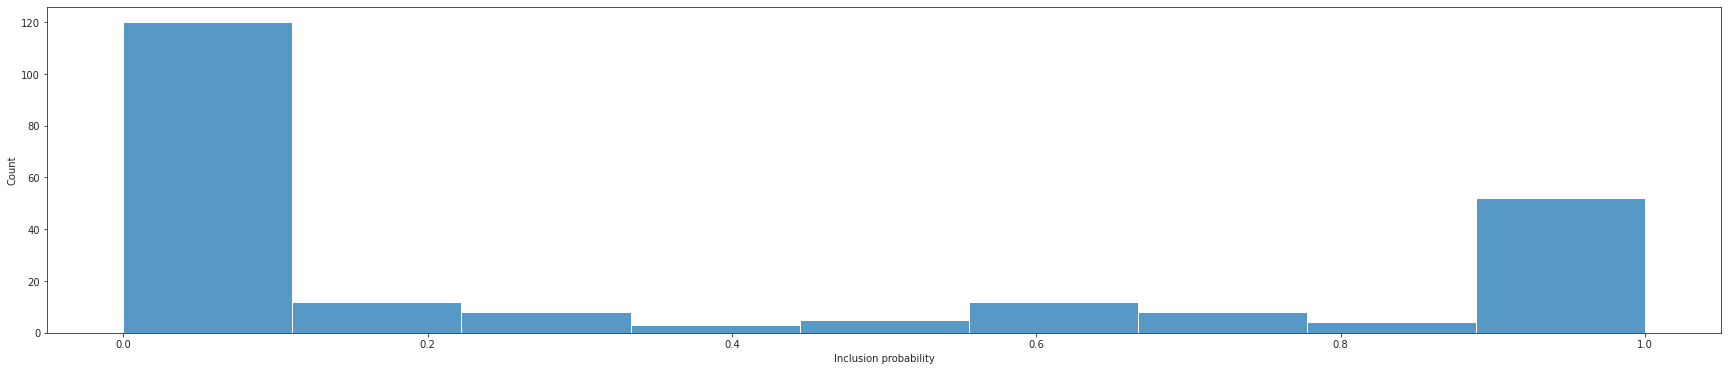

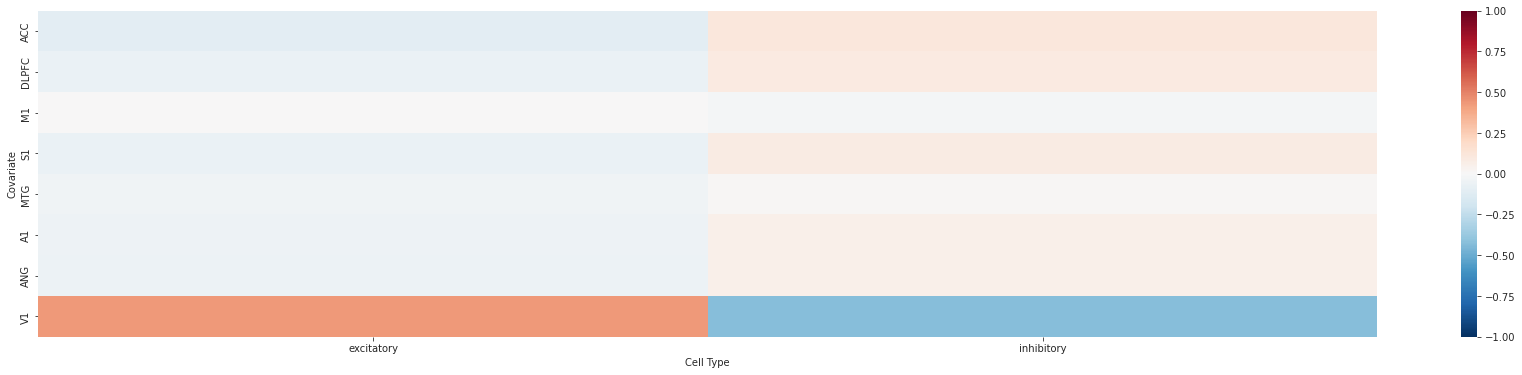

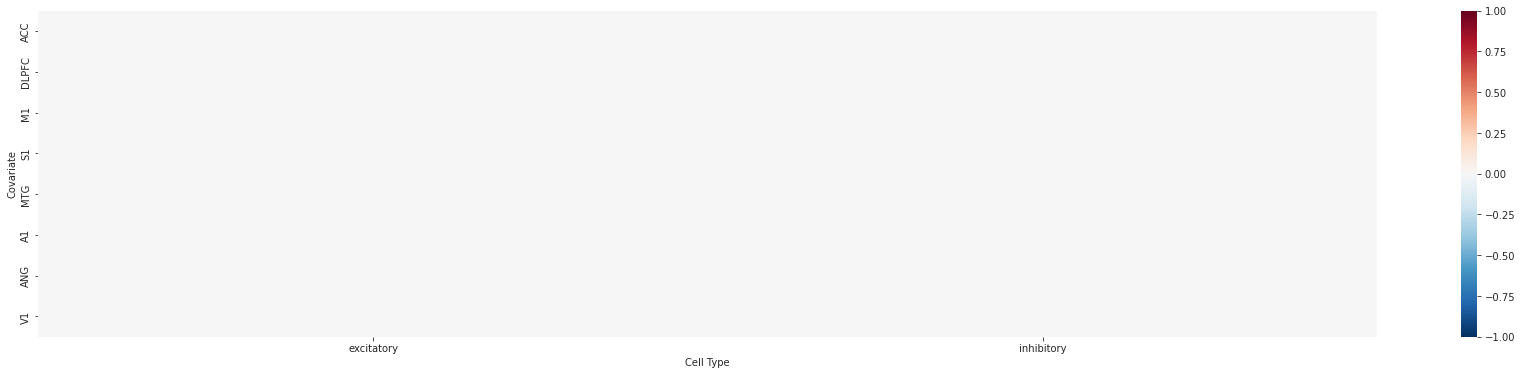

/scratch/fast/6427930/ipykernel_299333/1603249711.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  results_table["Covariate"].cat.reorder_categories(covariate_order, inplace=True)
/scratch/fast/6427930/ipykernel_299333/1603249711.py:38: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  results_table["Covariate"].cat.remove_unused_categories(inplace=True)


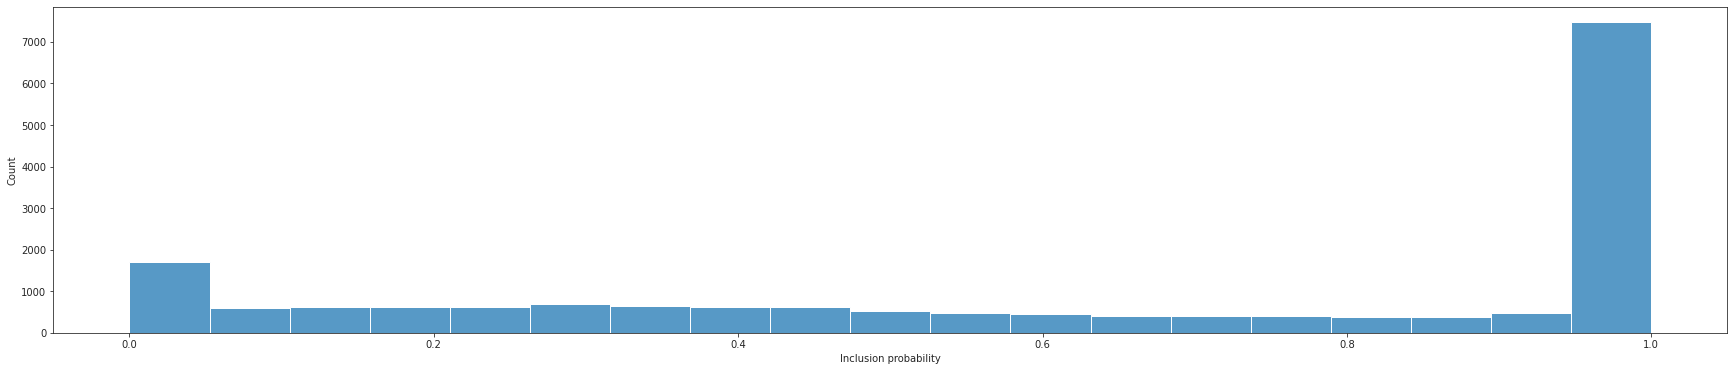

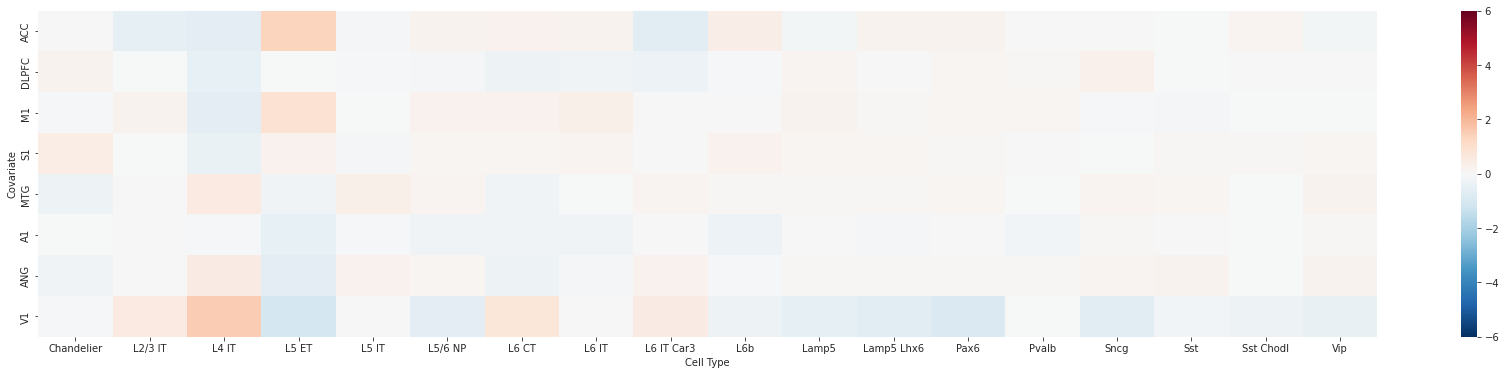

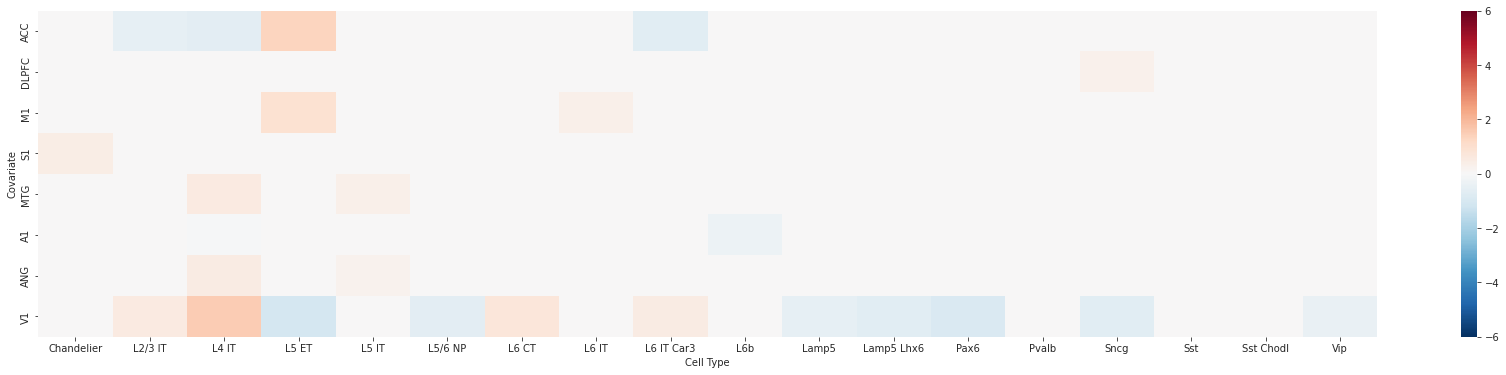

/scratch/fast/6427930/ipykernel_299333/1603249711.py:26: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  results_table["Cell Type"].cat.reorder_categories(plot_order[k], inplace=True)
/scratch/fast/6427930/ipykernel_299333/1603249711.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  results_table["Covariate"].cat.reorder_categories(covariate_order, inplace=True)
/scratch/fast/6427930/ipykernel_299333/1603249711.py:38: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  results_table["Covariate"].cat.remove_unused_categories(inplace=True)


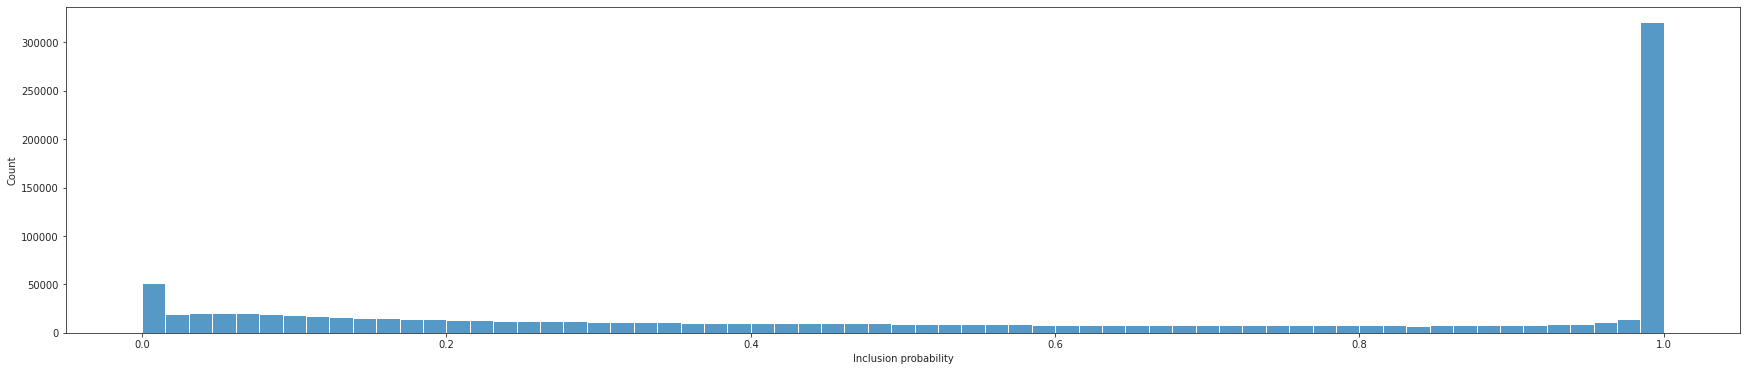

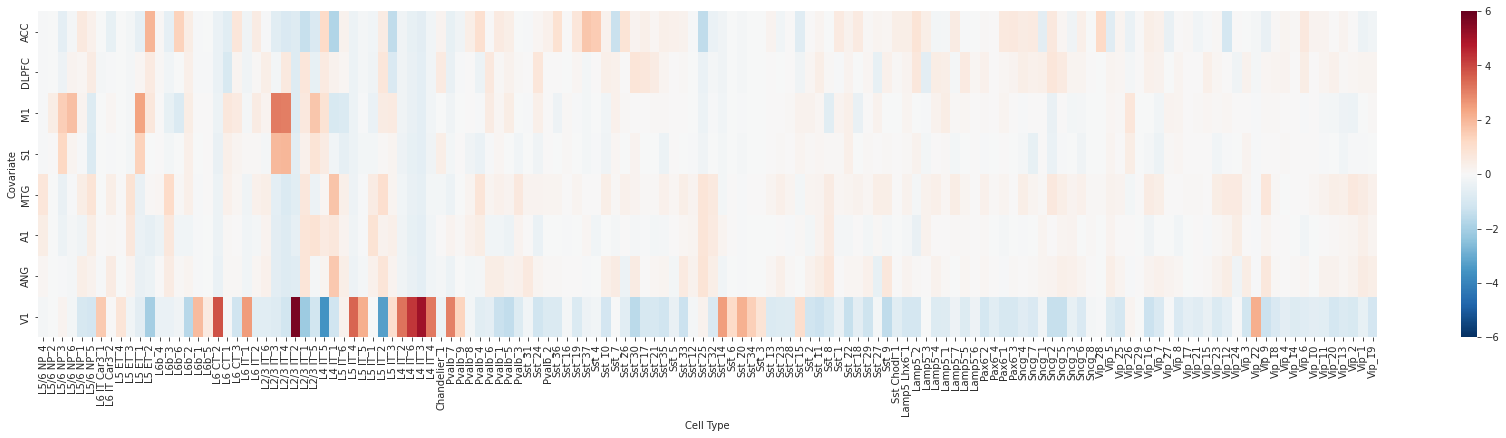

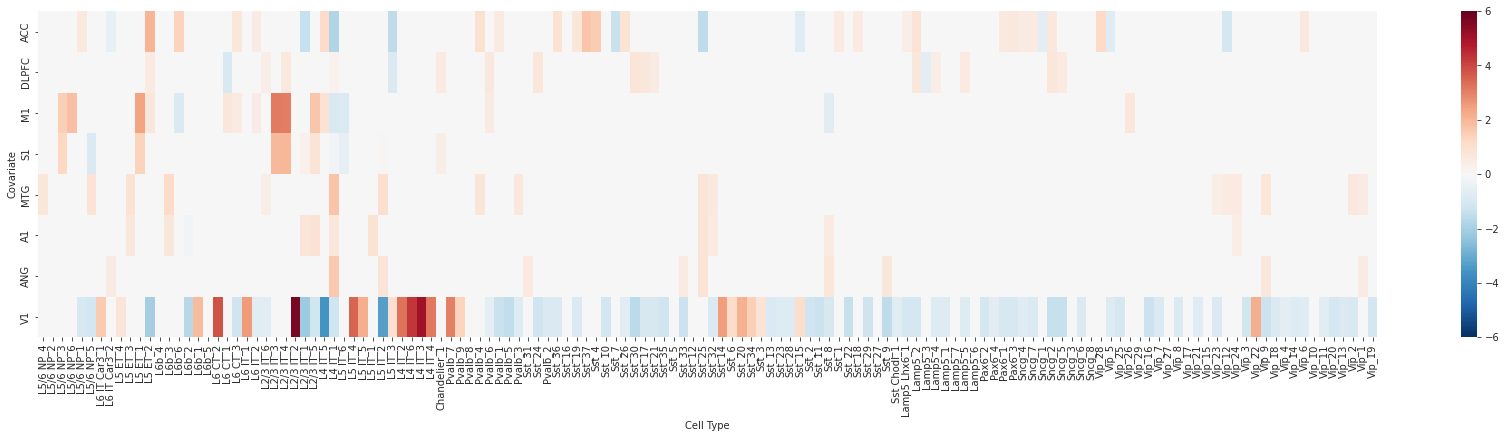

In [66]:
plt.rcParams['figure.figsize'] = (30,6)
plot_size = {"cross_area_subclass": [-6, 6], "cross_area_cluster": [-6, 6]}
dend_order = pd.read_csv("dend_order_neurons.csv", header=None)
plot_order = {"cross_area_cluster": dend_order.iloc[:, 0].to_list()}

plot_colors = {}
covariate_order = ["FPPFC", "V1", "ITG", "DLPFC", "VLPFC", "M1", "S1", "S1E", 
"PoCG", "ANG", "ACC", "SPL", "SMG", "A1", "sex[T.Male]"]
drop_covariates = ["sex[T.Male]"]

for j in tests:
    for k in labels_keys:
        results_tables = glob.glob(os.path.join("output", region, j, "**", "excitatory inhibitory_" + k + "_results.csv"))
        results_table = False
        for z in results_tables:
            tmp = pd.read_csv(z, index_col=0)
            tmp["Covariate"] = [re.sub("C\([^,]+, Treatment\('[^\)]+'\)\)\[T.([^\]]+)\]$", "\\1", y) for y in tmp["Covariate"]]
            try:
                results_table = pd.concat([results_table, tmp], axis=0)
            except:
                results_table = tmp.copy()
        
        results_table["Credible"] = results_table["Final Parameter"] != 0
        
        try:
            results_table["Cell Type"] = results_table["Cell Type"].astype("category")
            results_table["Cell Type"].cat.reorder_categories(plot_order[k], inplace=True) 
        except:
            pass
        
        try:
            results_table["Covariate"] = results_table["Covariate"].astype("category")
            results_table["Covariate"].cat.reorder_categories(covariate_order, inplace=True)
        except:
            pass
        
        try:
            results_table = results_table.loc[[l not in drop_covariates for l in results_table["Covariate"]], :]
            results_table["Covariate"].cat.remove_unused_categories(inplace=True)
        except:
            pass
        
        sns.histplot(results_table["Inclusion probability"]);
        plt.show();
        
        tmp = results_table.loc[:, ["Covariate", "Cell Type", "Final Parameter"]].groupby(["Covariate", "Cell Type"]).mean().reset_index()
        tmp.columns = ["Covariate", "Cell Type", "Effect Size"]
        ax = sns.heatmap(
            tmp.pivot(index="Covariate", columns="Cell Type", values="Effect Size"),
            center=0,
            cmap="RdBu_r",
            vmin=plot_size[k][0],
            vmax=plot_size[k][1],
            xticklabels=True
        );
        plt.savefig(os.path.join(pwd, "output", "figures", "neurons_" + j + "_" + k + "_effect_size_unfiltered.pdf"), bbox_inches="tight")
        plt.show();
        tmp.to_csv(os.path.join(pwd, "output", "figures", "neurons_" + j + "_" + k + "_effect_size_unfiltered.csv"))
        
        tmp2 = results_table.loc[:, ["Covariate", "Cell Type", "Inclusion probability"]].groupby(["Covariate", "Cell Type"]).mean().reset_index()
        tmp.loc[tmp2["Inclusion probability"] < 0.8, "Effect Size"] = 0
        ax = sns.heatmap(
            tmp.pivot(index="Covariate", columns="Cell Type", values="Effect Size"),
            center=0, cmap="RdBu_r",
            vmin=plot_size[k][0],
            vmax=plot_size[k][1],
            xticklabels=True
        );
        plt.savefig(os.path.join(pwd, "output", "figures", "neurons_" + j + "_" + k + "_effect_size_p_gt_0.8.pdf"), bbox_inches="tight")
        plt.show();
        tmp.to_csv(os.path.join(pwd, "output", "figures", "neurons_" + j + "_" + k + "_effect_size_p_gt_0.8.csv"))
            
plt.rcParams['figure.figsize'] = (6,4)